In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
from IPython.display import clear_output
import tensorflow as tf


In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [ ]:
# dftrain=pd.read_csv("train.csv")

# dfeval=pd.read_csv("tested.csv")


# # print(dftrain.head())
# y_train=dftrain.pop("Survived")
# y_eval=dfeval.pop('Survived')
# # print(dftrain.head())
# # print("______")
# # print(y_train)
# print(dftrain.loc[0],y_train.loc[0])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

so we have 891 entries and 9 features

<Axes: >

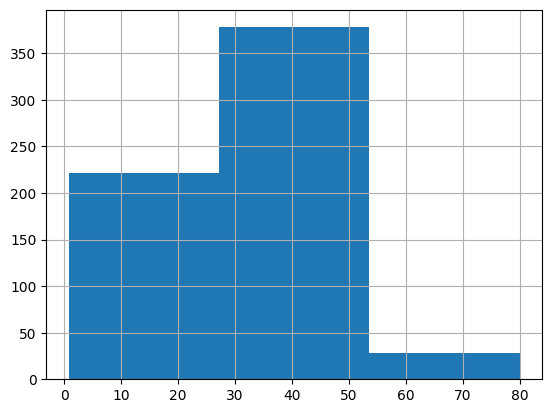

In [ ]:
dftrain.age.hist(bins=3)

<Axes: >

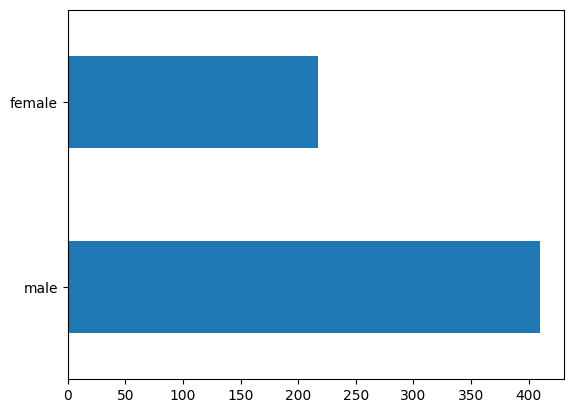

In [ ]:
dftrain.sex.value_counts().plot(kind="barh")

<Axes: >

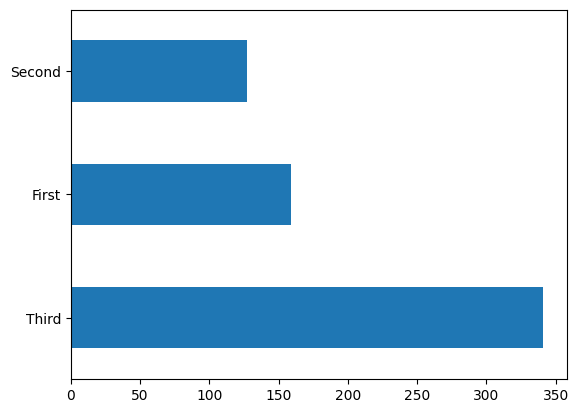

In [ ]:
dftrain["class"].value_counts().plot(kind="barh")

Text(0.5, 0, '%survive')

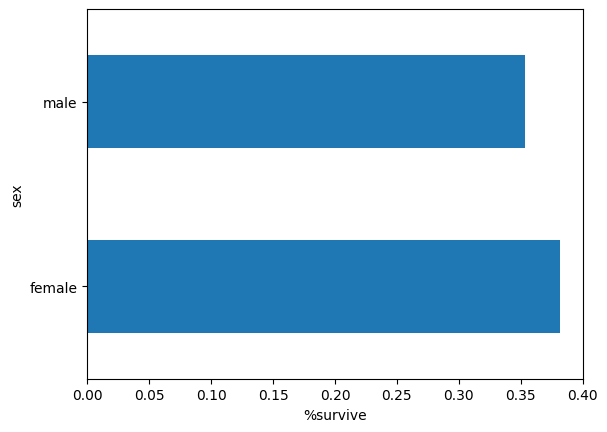

In [ ]:
pd.concat([dfeval,y_train],axis=1).groupby("sex").survived.mean().plot(kind='barh').set_xlabel("%survive")

Training vs Testing

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
dftrain.shape

(627, 9)

In [ ]:
CATEGORICAL_COLUMNS=["Sex","SibSp","Parch","Pclass","Embarked",'Ticket',"Cabin"]

In [ ]:
NUMERIC_COLUMNS=["Age","Fare"]

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

Feeding data

In [ ]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      ds=ds.shuffle(100)
    ds=ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [ ]:
train_input_fn=make_input_fn(dftrain,y_train)
eval_input_fn=make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)

Creating The Model

In [ ]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Training the Model

In [ ]:
linear_est.train(train_input_fn)#train
result=linear_est.evaluate(eval_input_fn)
clear_output()
print(result['accuracy'])

0.7651515


Prediction


In [ ]:
result=list(linear_est.predict(eval_input_fn))
print(dfeval.loc[2])
print(y_eval.loc[2])
print(result[2]['probabilities'][1])

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
1
0.57875556
